In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import warnings # Suppress annoying warnings
warnings.filterwarnings('ignore')

### Load the GeoData of the Province of Cavite

In [2]:
cavite = gpd.GeoDataFrame.from_file("geodata/Cavite.shp")

### Filter the GeoData and only get the bounds of Bacoor City since we are only interested in Bacoor

In [3]:
bacoor = cavite.loc[cavite['NAME_2'] == "Bacoor"]

bacoor.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry
97,177,PHL,Philippines,24,Cavite,419,Bacoor,9998,Alima,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.93547 14.46000, 120.93548 14.459..."
98,177,PHL,Philippines,24,Cavite,419,Bacoor,9999,Aniban I,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96854 14.44872, 120.96831 14.448..."
99,177,PHL,Philippines,24,Cavite,419,Bacoor,10000,Aniban II,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96870 14.45208, 120.96856 14.451..."
100,177,PHL,Philippines,24,Cavite,419,Bacoor,10001,Aniban III,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96845 14.45443, 120.96845 14.454..."
101,177,PHL,Philippines,24,Cavite,419,Bacoor,10002,Aniban IV,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96873 14.45595, 120.96886 14.455..."


### Plot the shape of Bacoor's barangay boundaries

Text(0.5, 1.0, 'Bacoor City per Barangay')

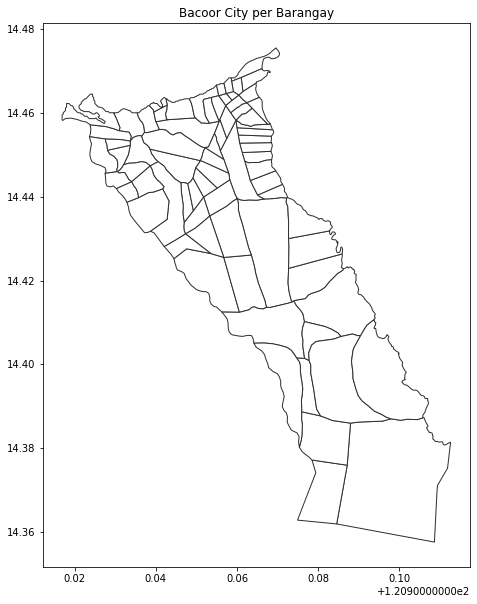

In [4]:
fig, axes = plt.subplots(figsize=(10,10));
bacoor.plot(ax=axes,color='white', edgecolor = '#2e3131')
axes.set_title("Bacoor City per Barangay")

### Initialize the data I manually gathered from the City Government's Facebook Page
#### The data variable is the data during April 2 while the data_pre_ecq is the data during March 8

In [5]:
# April 2 Data
"""
data = {
    "Alima": 12,
    "Aniban I": 5,
    "Aniban II": 2,
    "Aniban III": 1,
    "Aniban IV": 2,
    "Aniban V": 6,
    "Banalo": 8,
    "Bayanan": 35,
    "Campo Santo": 0,
    "Daang Bukid": 7,
    "Digman": 1,
    "Dulong Bayan": 19,
    "Habay I": 47,
    "Habay II": 12,
    "Kaingen": 16,
    "Ligas I": 12,
    "Ligas II": 31,
    "Ligas III": 12,
    "Mabolo I": 9,
    "Mabolo II": 1,
    "Mabolo III": 25,
    "Maliksi I": 5,
    "Maliksi II": 0,
    "Maliksi III": 2,
    "Mambog I": 28,
    "Mambog II": 6,
    "Mambog III": 40,
    "Mambog IV": 47,
    "Mambog V": 2,
    "Molino I": 14,
    "Molino II": 42,
    "Molino III": 126,
    "Molino IV": 140,
    "Molino V": 17,
    "Molino VI": 60,
    "Molino VII": 9,
    "Niog I": 6,
    "Niog II": 17,
    "Niog III": 21,
    "P.F. Espiritu I": 3,
    "P.F. Espiritu II": 4,
    "P.F. Espiritu III": 6,
    "P.F. Espiritu IV": 13,
    "P.F. Espiritu V": 14,
    "P.F. Espiritu VI": 5,
    "P.F. Espiritu VII": 10,
    "P.F. Espiritu VIII": 34,
    "Queens Row Central": 12,
    "Queens Row East": 18,
    "Queen Row West": 27,
    "Real I": 4,
    "Real II": 9,
    "Salinas I": 23,
    "Salinas II": 17,
    "Salinas III": 6,
    "Salinas IV": 11,
    "San Nicolas I": 8,
    "San Nicolas II": 27,
    "San Nicolas III": 29,
    "Sineguelasan": 11,
    "Tabing Dagat": 3,
    "Talaba I": 0,
    "Talaba II": 7,
    "Talaba III": 5,
    "Talaba IV": 2,
    "Talaba V": 9,
    "Talaba VI": 0,
    "Talaba VII": 0,
    "Zapote I": 1,
    "Zapote II": 0,
    "Zapote III": 0,
    "Zapote IV": 6,
    "Zapote V": 13
}
"""

data = {
    "Alima": 15,
    "Aniban I": 10,
    "Aniban II": 2,
    "Aniban III": 2,
    "Aniban IV": 5,
    "Aniban V": 7,
    "Banalo": 10,
    "Bayanan": 30,
    "Campo Santo": 0,
    "Daang Bukid": 11,
    "Digman": 3,
    "Dulong Bayan": 13,
    "Habay I": 50,
    "Habay II": 14,
    "Kaingen": 20,
    "Ligas I": 16,
    "Ligas II": 4,
    "Ligas III": 27,
    "Mabolo I": 5,
    "Mabolo II": 3,
    "Mabolo III": 24,
    "Maliksi I": 8,
    "Maliksi II": 2,
    "Maliksi III": 7,
    "Mambog I": 33,
    "Mambog II": 11,
    "Mambog III": 59,
    "Mambog IV": 33,
    "Mambog V": 5,
    "Molino I": 28,
    "Molino II": 43,
    "Molino III": 167,
    "Molino IV": 172,
    "Molino V": 24,
    "Molino VI": 74,
    "Molino VII": 14,
    "Niog I": 6,
    "Niog II": 13,
    "Niog III": 20,
    "P.F. Espiritu I": 6,
    "P.F. Espiritu II": 9,
    "P.F. Espiritu III": 3,
    "P.F. Espiritu IV": 16,
    "P.F. Espiritu V": 14,
    "P.F. Espiritu VI": 6,
    "P.F. Espiritu VII": 10,
    "P.F. Espiritu VIII": 38,
    "Queens Row Central": 7,
    "Queens Row East": 16,
    "Queen Row West": 22,
    "Real I": 3,
    "Real II": 8,
    "Salinas I": 20,
    "Salinas II": 14,
    "Salinas III": 6,
    "Salinas IV": 12,
    "San Nicolas I": 11,
    "San Nicolas II": 30,
    "San Nicolas III": 36,
    "Sineguelasan": 9,
    "Tabing Dagat": 3,
    "Talaba I": 1,
    "Talaba II": 9,
    "Talaba III": 2,
    "Talaba IV": 1,
    "Talaba V": 10,
    "Talaba VI": 4,
    "Talaba VII": 0,
    "Zapote I": 2,
    "Zapote II": 1,
    "Zapote III": 2,
    "Zapote IV": 2,
    "Zapote V": 15
}

data_pre_ecq = {
    "Alima": 0,
    "Aniban I": 0,
    "Aniban II": 0,
    "Aniban III": 0,
    "Aniban IV": 0,
    "Aniban V": 0,
    "Banalo": 0,
    "Bayanan": 7,
    "Campo Santo": 0,
    "Daang Bukid": 2,
    "Digman": 0,
    "Dulong Bayan": 1,
    "Habay I": 5,
    "Habay II": 2,
    "Kaingen": 2,
    "Ligas I": 4,
    "Ligas II": 1,
    "Ligas III": 0,
    "Mabolo I": 0,
    "Mabolo II": 0,
    "Mabolo III": 1,
    "Maliksi I": 2,
    "Maliksi II": 1,
    "Maliksi III": 3,
    "Mambog I": 5,
    "Mambog II": 3,
    "Mambog III": 11,
    "Mambog IV": 3,
    "Mambog V": 0,
    "Molino I": 9,
    "Molino II": 13,
    "Molino III": 44,
    "Molino IV": 36,
    "Molino V": 13,
    "Molino VI": 10,
    "Molino VII": 1,
    "Niog I": 1,
    "Niog II": 1,
    "Niog III": 0,
    "P.F. Espiritu I": 2,
    "P.F. Espiritu II": 1,
    "P.F. Espiritu III": 10,
    "P.F. Espiritu IV": 2,
    "P.F. Espiritu V": 4,
    "P.F. Espiritu VI": 0,
    "P.F. Espiritu VII": 1,
    "P.F. Espiritu VIII": 1,
    "Queens Row Central": 0,
    "Queens Row East": 0,
    "Queen Row West": 1,
    "Real I": 1,
    "Real II": 0,
    "Salinas I": 0,
    "Salinas II": 6,
    "Salinas III": 1,
    "Salinas IV": 0,
    "San Nicolas I": 2,
    "San Nicolas II": 4,
    "San Nicolas III": 7,
    "Sineguelasan": 4,
    "Tabing Dagat": 1,
    "Talaba I": 1,
    "Talaba II": 0,
    "Talaba III": 0,
    "Talaba IV": 0,
    "Talaba V": 0,
    "Talaba VI": 0,
    "Talaba VII": 0,
    "Zapote I": 0,
    "Zapote II": 0,
    "Zapote III": 3,
    "Zapote IV": 1,
    "Zapote V": 2
}


### Create a column for the two available data

In [6]:
bacoor['active_cases'] = 0
bacoor['pre_ecq_active_cases'] = 0

bacoor.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry,active_cases,pre_ecq_active_cases
97,177,PHL,Philippines,24,Cavite,419,Bacoor,9998,Alima,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.93547 14.46000, 120.93548 14.459...",0,0
98,177,PHL,Philippines,24,Cavite,419,Bacoor,9999,Aniban I,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96854 14.44872, 120.96831 14.448...",0,0
99,177,PHL,Philippines,24,Cavite,419,Bacoor,10000,Aniban II,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96870 14.45208, 120.96856 14.451...",0,0
100,177,PHL,Philippines,24,Cavite,419,Bacoor,10001,Aniban III,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96845 14.45443, 120.96845 14.454...",0,0
101,177,PHL,Philippines,24,Cavite,419,Bacoor,10002,Aniban IV,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96873 14.45595, 120.96886 14.455...",0,0


### Take a peak of how is the bounds returned (min x, min y, max x, max y)

In [7]:
bacoor.iloc[0].geometry.bounds # coordinates for random points

(120.92961883544925, 14.453269958496161, 120.93723297119142, 14.46098041534427)

### Transfer the data from the dictionary to the Geo Dataframe

In [8]:
for i in data:
    bacoor.loc[bacoor.NAME_3 == i, "active_cases"] = data[i]

for i in data_pre_ecq:
    bacoor.loc[bacoor.NAME_3 == i, "pre_ecq_active_cases"] = data_pre_ecq[i]


### Take a peak of our manipulated Geo Dataframe

In [9]:
bacoor.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry,active_cases,pre_ecq_active_cases
97,177,PHL,Philippines,24,Cavite,419,Bacoor,9998,Alima,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.93547 14.46000, 120.93548 14.459...",15,0
98,177,PHL,Philippines,24,Cavite,419,Bacoor,9999,Aniban I,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96854 14.44872, 120.96831 14.448...",10,0
99,177,PHL,Philippines,24,Cavite,419,Bacoor,10000,Aniban II,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96870 14.45208, 120.96856 14.451...",2,0
100,177,PHL,Philippines,24,Cavite,419,Bacoor,10001,Aniban III,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96845 14.45443, 120.96845 14.454...",2,0
101,177,PHL,Philippines,24,Cavite,419,Bacoor,10002,Aniban IV,None,None,Barangay,Village,Cavite,CALABARZON (Region IV-A),"POLYGON ((120.96873 14.45595, 120.96886 14.455...",5,0


### Generate a colormap based on the cases during the time given

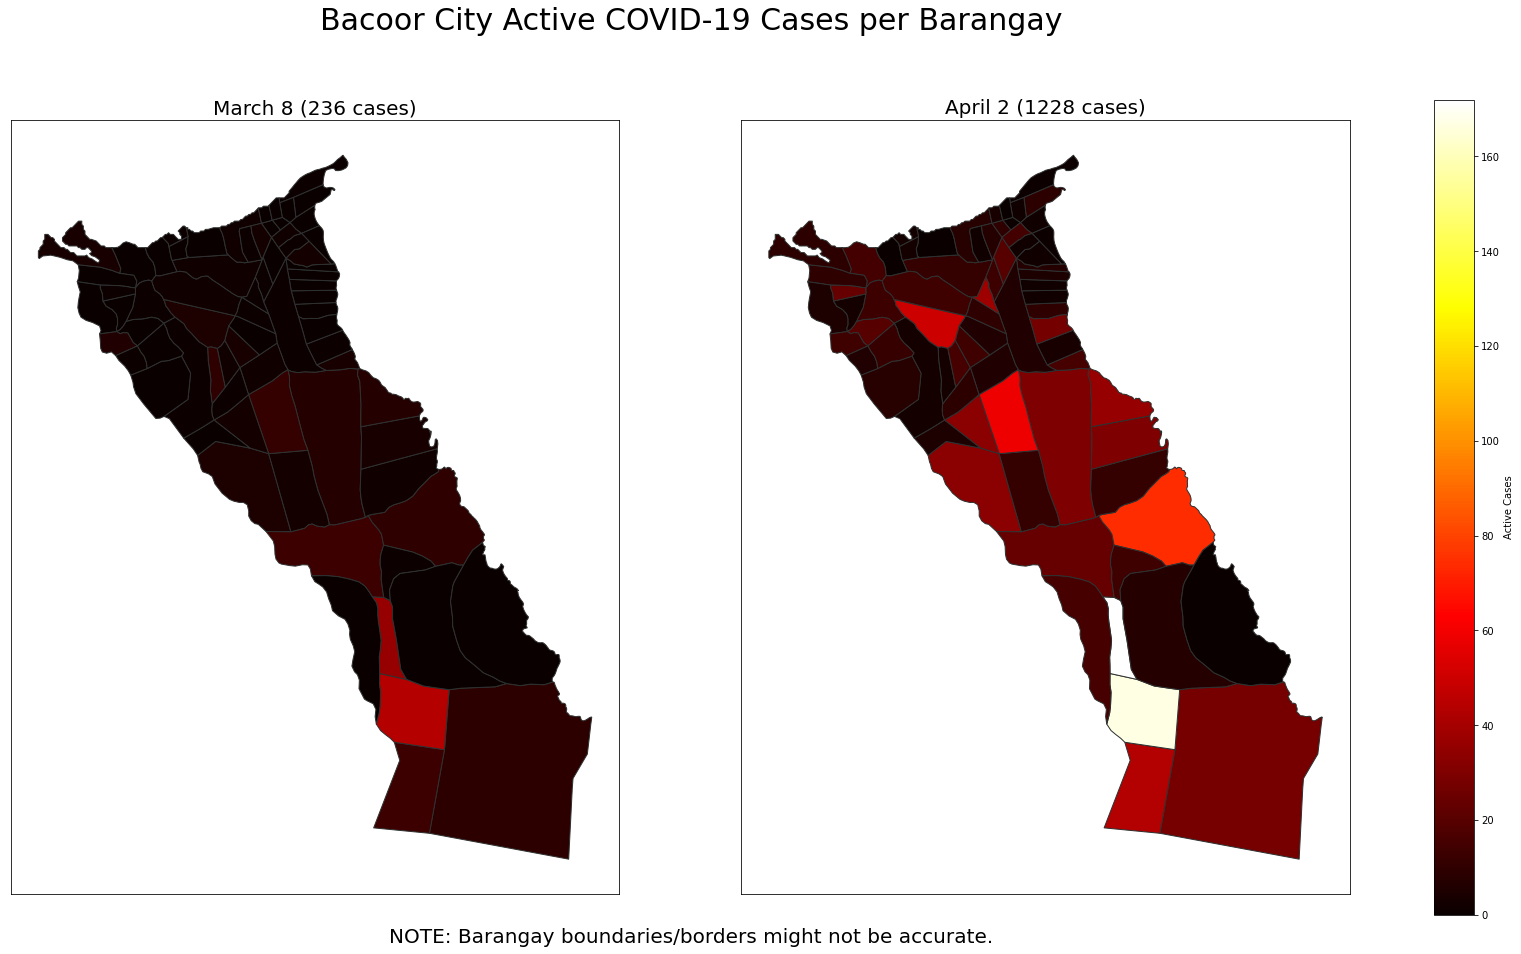

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(30,20)) # Initialize the subplot with a dimension of one row, two columns

axes[0].set(xticks=[], yticks=[]) # Remove the coordinate ticks to make the map cleaner
axes[1].set(xticks=[], yticks=[])

# Plot the data based on the intensity of the numerical values of it pero barangay
bacoor.plot(ax=axes[0], edgecolor = '#2e3131', column="pre_ecq_active_cases", cmap='hot', vmin=0, vmax=max(data.values()))
bacoor.plot(ax=axes[1], edgecolor = '#2e3131', column="active_cases", cmap='hot', vmin=0, vmax=max(data.values()))

#bacoor.apply(lambda x: axes[0].annotate(s=x.NAME_3, xy=x.geometry.centroid.coords[0], va="center", ha="center", color="black", rotation=25),axis=1);
#bacoor.apply(lambda x: axes[1].annotate(s=x.NAME_3, xy=x.geometry.centroid.coords[0], va="center", ha="center", color="black", rotation=25),axis=1);

# Name the subplots based on the data for clarity
axes[0].set_title("March 8 (236 cases)", fontsize=20)
axes[1].set_title("April 2 (1228 cases)", fontsize=20)

# Edit the legend for clarity
patch_col = axes[-1].collections[0]
cb = fig.colorbar(patch_col, ax=axes, shrink=0.75)
cb.set_label('Active Cases')

# Initialize titles for clarity
plt.figtext(0.44, 0.2, "NOTE: Barangay boundaries/borders might not be accurate.", ha="center", fontsize=20)

fig.suptitle("Bacoor City Active COVID-19 Cases per Barangay", fontsize=30, ha="center", x=0.44, y=0.85)

plt.savefig("bacoor.png")

plt.show()

### Create utility functions for the generation of our dot density map
#### Credits to Andrew Gaidus for this algorithm.

In [11]:
from numpy.random import RandomState
from shapely.geometry import Point

def generate_pts(polygon, point_count, seed = 10) -> list:
    min_x, min_y, max_x, max_y = polygon.bounds

    points = []

    i = 0
    while len(points) < point_count:
        state = RandomState(seed+i)

        pt = Point([state.uniform(min_x, max_x), state.uniform(min_y, max_y)])

        if pt.within(polygon):
            points.append(pt)
        
        i+=1
    
    return points

def generate_dot_density(geometry, values, pts_per_val=None, seed = 10):
    if pts_per_val:
        new_values = (values/pts_per_val).astype(int)
    else:
        new_values = values

    new_values = new_values[new_values>0]

    g = gpd.GeoDataFrame(data = {'vals':new_values}, geometry = geometry)
    
    a = g.apply(lambda row: tuple(generate_pts(row['geometry'], row['vals'], seed)),1)
    b = gpd.GeoSeries(a.apply(pd.Series).stack(), crs = geometry.crs)
    b.name='geometry'
    return b

### Generate the dot density map based on the number of cases per barangay

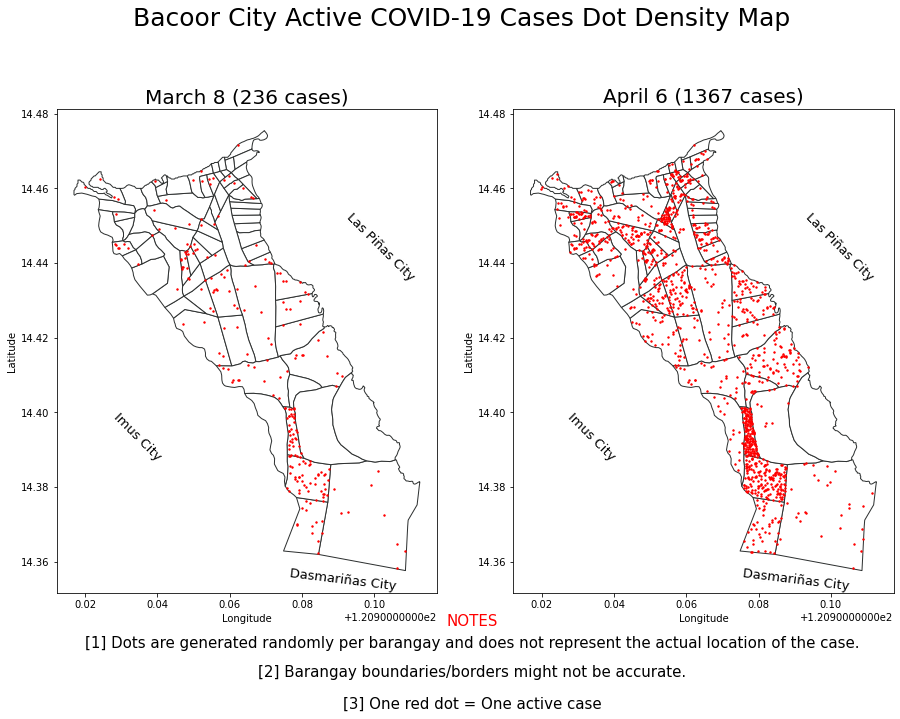

In [12]:
temp = gpd.GeoDataFrame(data={'baranggay': bacoor['NAME_3'], 'cases': bacoor['active_cases']}, geometry = bacoor['geometry'])
temp1 = gpd.GeoDataFrame(data={'baranggay': bacoor['NAME_3'], 'cases': bacoor['pre_ecq_active_cases']}, geometry = bacoor['geometry'])

dd = generate_dot_density(temp.geometry, temp.cases)
dd1 = generate_dot_density(temp1.geometry, temp1.cases)

fig, axes = plt.subplots(1,2,figsize=(15,10))

#axes[0].set(xticks=[], yticks=[])
#axes[1].set(xticks=[], yticks=[])

temp.plot(ax=axes[1], edgecolor = '#2e3131', color='white', legend=True)
dd.plot(ax=axes[1], color='red', markersize=2)

temp1.plot(ax=axes[0], edgecolor = '#2e3131', color='white', legend=True)
dd1.plot(ax=axes[0], color='red', markersize=2)

axes[0].set_title("March 8 (236 cases)", fontsize=20)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

axes[1].set_title("April 6 (1367 cases)", fontsize=20)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.figtext(0.51, 0.12, "NOTES", ha="center", fontsize=15, color='red')
plt.figtext(0.51, 0.09, "[1] Dots are generated randomly per barangay and does not represent the actual location of the case.", ha="center", fontsize=15)
plt.figtext(0.51, 0.05, "[2] Barangay boundaries/borders might not be accurate.", ha="center", fontsize=15)
plt.figtext(0.51, 0.005, "[3] One red dot = One active case", ha="center", fontsize=15)

plt.figtext(0.2, 0.35, "Imus City", ha="center", fontsize=13, rotation = -45)
plt.figtext(0.62, 0.35, "Imus City", ha="center", fontsize=13, rotation = -45)

plt.figtext(0.425, 0.6, "Las Piñas City", ha="center", fontsize=13, rotation = -45)
plt.figtext(0.85, 0.6, "Las Piñas City", ha="center", fontsize=13, rotation = -45)

plt.figtext(0.81, 0.17, "Dasmariñas City", ha="center", fontsize=13, rotation = -7)
plt.figtext(0.39, 0.17, "Dasmariñas City", ha="center", fontsize=13, rotation = -7)

fig.suptitle("Bacoor City Active COVID-19 Cases Dot Density Map", fontsize=25, ha="center")


plt.show()

#fig_name = datetime.now().strftime('%A %d %B %Y')

fig.savefig("march8vsapril6.png")
